<a class="anchor" id="toc"></a>
# Distribution of different GMCs within galaxies

1. [Sun+2020 molecular gas surface densities](#sun20)

In [1]:
from gmc_module import *

# Check Sun+2020 molecular surface densities <a class="anchor" id="sun20"></a>
([back to top](#toc))

In [2]:
sun20 = pd.read_csv('/media/phd/catalogo/Sun2020/tableb1.dat', delim_whitespace=True,
           names=['Name', 'scale', 'rgal', 'Cent', 'Arm', 'iArm', 'ICO21', 'Sigma', 'Vdisp', 'Pturb', 'aVir']
           ).set_index('Name')
len(sun20), len(list(set(sun20.index)))

(182628, 70)

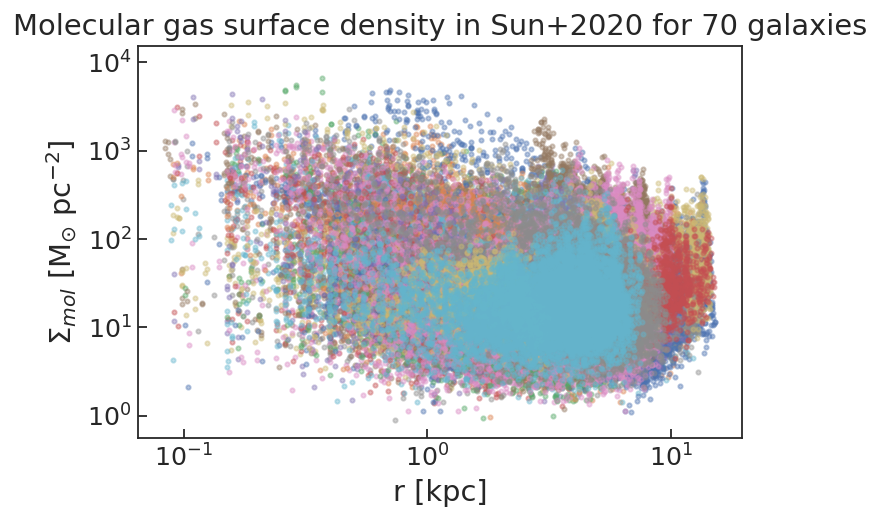

In [3]:
for g in list(set(sun20.index)):
    plt.loglog(sun20.loc[g, 'rgal'], sun20.loc[g, 'Sigma'], '.', label=g, alpha=.4)
plt.title('Molecular gas surface density in Sun+2020 for 70 galaxies')
plt.xlabel('r [kpc]')
plt.ylabel(r'$\Sigma_{mol}$ [M$_{\odot}$ pc$^{-2}$]');

In [4]:
print('Our GMC surface densities:')
for gmc in gmclist:
    print(gmc.name, '\t %.2f' % (gmc.M/(2*np.pi*gmc.R**2)) + ' Msun/pc^2')

Our GMC surface densities:
A 	 61.67 Msun/pc^2
B 	 61.55 Msun/pc^2
C 	 62.07 Msun/pc^2
V19 	 70.74 Msun/pc^2


In [6]:
sun20.loc[sun20.index[0]]

,scale,rgal,Cent,Arm,iArm,ICO21,Sigma,Vdisp,Pturb,aVir
Name,,,,,,,,,,
Circinus,150,0.000,1,0,0,768.000,3423.00,76.640,657400000.0,5.280
Circinus,150,0.154,1,0,0,475.500,2161.00,40.530,116000000.0,2.339
Circinus,150,0.154,1,0,0,364.900,1659.00,41.240,92280000.0,3.154
Circinus,150,0.290,1,0,0,343.300,1596.00,45.950,110100000.0,4.071
Circinus,150,0.290,1,0,0,519.100,2398.00,74.110,430500000.0,7.048
...,...,...,...,...,...,...,...,...,...,...
Circinus,150,3.883,0,0,0,2.860,22.76,3.793,10710.0,1.946
Circinus,150,3.892,0,0,0,2.400,19.11,3.838,9205.0,2.372
Circinus,150,3.912,0,0,0,1.349,10.79,3.277,3789.0,3.061


In [7]:
g = 'Circinus'
radii = np.linspace(0, sun20.loc[g, 'rgal'].max(), 100)
sigma = []
for i in range(len(radii)-1):
    this = []
    '''  CHECK AND DEVELOP
    for line in sun20.loc[g]:
        r = sun20.loc[line, 'rgal']
        if r > radii[i] and r <= radii[i+1]:
            this.append(sun20.loc[line, 'Sigma'])
    '''